In [30]:
import pandas
table = pandas.read_csv("inpatientCharges.csv")
table

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44
...,...,...,...,...,...,...,...,...,...,...,...,...
163060,948 - SIGNS & SYMPTOMS W/O MCC,670041,SETON MEDICAL CENTER WILLIAMSON,201 SETON PARKWAY,ROUND ROCK,TX,78664,TX - Austin,23,$26314.39,$3806.86,$3071.39
163061,948 - SIGNS & SYMPTOMS W/O MCC,670055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,SAN ANTONIO,TX,78258,TX - San Antonio,11,$21704.72,$4027.36,$2649.72
163062,948 - SIGNS & SYMPTOMS W/O MCC,670056,SETON MEDICAL CENTER HAYS,6001 KYLE PKWY,KYLE,TX,78640,TX - Austin,19,$39121.73,$5704.36,$4058.36
163063,948 - SIGNS & SYMPTOMS W/O MCC,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,231 SOUTH COLLINS ROAD,SUNNYVALE,TX,75182,TX - Dallas,11,$28873.09,$7663.09,$6848.54


In [33]:
def clean_inpatient_data(df):
    # Preparing a dict with old columns as keys, with new columns as values
    old_cols = df.columns.values
    new_cols = {}
    for i in range(len(old_cols)):
        new_cols[old_cols[i]] = old_cols[i].strip().replace(' ', '_').lower()
    # Renaming all columns names via pandas rename() function
    df = df.rename(columns=new_cols)
    
    # Parsing financial values as floats
    df['average_covered_charges'] = df['average_covered_charges'].str[1:].astype(float)
    df['average_total_payments'] = df['average_total_payments'].str[1:].astype(float)
    df['average_medicare_payments'] = df['average_medicare_payments'].str[1:].astype(float)

    return df

# Cleaned dataframe
cleaned_impatient_df = clean_inpatient_data(table)

In [34]:
cleaned_impatient_df.columns.values

array(['drg_definition', 'provider_id', 'provider_name',
       'provider_street_address', 'provider_city', 'provider_state',
       'provider_zip_code', 'hospital_referral_region_description',
       'total_discharges', 'average_covered_charges',
       'average_total_payments', 'average_medicare_payments'],
      dtype=object)

In [35]:
#create new file with cleaned data
cleaned_impatient_df.to_csv('inpatient_charges_cleaned.csv', index=False)

In [36]:
new_table = cleaned_impatient_df.loc[cleaned_impatient_df['provider_state'] == 'FL']
new_table

,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
162,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,100002,BETHESDA MEMORIAL HOSPITAL,2815 S SEACREST BLVD,BOYNTON BEACH,FL,33435,FL - Fort Lauderdale,23,40686.73,6523.78,5339.82
163,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,100006,ORLANDO HEALTH,1414 S KUHL AVE,ORLANDO,FL,32806,FL - Orlando,40,43779.57,6849.75,5685.77
164,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,100007,FLORIDA HOSPITAL,601 E ROLLINS ST,ORLANDO,FL,32803,FL - Orlando,93,33949.48,6845.37,5042.31
165,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,100012,LEE MEMORIAL HOSPITAL,2776 CLEVELAND AVE,FORT MYERS,FL,33901,FL - Fort Myers,70,31951.05,6382.40,4921.15
166,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,100017,HALIFAX HEALTH MEDICAL CENTER,303 N CLYDE MORRIS BLVD,DAYTONA BEACH,FL,32114,FL - Ormond Beach,55,19028.00,7061.41,4850.74
...,...,...,...,...,...,...,...,...,...,...,...,...
161671,948 - SIGNS & SYMPTOMS W/O MCC,100290,"VILLAGES REGIONAL HOSPITAL, THE",1451 EL CAMINO REAL,THE VILLAGES,FL,32159,FL - Orlando,39,16739.23,3584.69,2863.15
161672,948 - SIGNS & SYMPTOMS W/O MCC,100291,WUESTHOFF MEDICAL CENTER - MELBOURNE,250 NORTH WICKHAM ROAD,MELBOURNE,FL,32935,FL - Orlando,21,15086.47,3763.28,3010.14
161673,948 - SIGNS & SYMPTOMS W/O MCC,100296,DOCTORS HOSPITAL INC,5000 UNIVERSITY DR,CORAL GABLES,FL,33146,FL - Miami,14,40913.14,4522.57,3799.42
161674,948 - SIGNS & SYMPTOMS W/O MCC,100299,LAKEWOOD RANCH MEDICAL CENTER,8330 LAKEWOOD RANCH BOULEVARD,BRADENTON,FL,34202,FL - Bradenton,17,15430.76,3600.23,2745.88


In [37]:
new_table1 = cleaned_impatient_df.loc[(cleaned_impatient_df['drg_definition'] == '039 - EXTRACRANIAL PROCEDURES W/O CC/MCC') & (cleaned_impatient_df['provider_state'] == 'NY')]
new_table1

,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
661,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,330005,KALEIDA HEALTH,"726 EXCHANGE STREET, SUITE 522",BUFFALO,NY,14210,NY - Buffalo,23,27984.39,7567.39,6636.43
662,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,330011,"OUR LADY OF LOURDES MEMORIAL HOSPITAL, INC",169 RIVERSIDE DRIVE,BINGHAMTON,NY,13905,NY - Binghamton,16,17173.12,5777.00,4649.00
663,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,330013,ALBANY MEDICAL CENTER HOSPITAL,43 NEW SCOTLAND AVENUE,ALBANY,NY,12208,NY - Albany,72,19226.16,7478.16,6554.31
664,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,330023,VASSAR BROTHERS MEDICAL CENTER,45 READE PLACE,POUGHKEEPSIE,NY,12601,NY - Albany,39,25330.12,7125.12,6116.61
665,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,330024,MOUNT SINAI HOSPITAL,ONE GUSTAVE L LEVY PLACE,NEW YORK,NY,10029,NY - Manhattan,29,22169.41,11165.17,9504.37
666,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,330028,RICHMOND UNIVERSITY MEDICAL CENTER,355 BARD AVENUE,STATEN ISLAND,NY,10304,NY - Manhattan,12,32246.66,10165.00,9321.33
667,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,330044,FAXTON-ST LUKE'S HEALTHCARE,1656 CHAMPLIN AVENUE,UTICA,NY,13503,NY - Elmira,40,19167.42,5740.32,4673.70
668,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,330057,ST PETER'S HOSPITAL,315 SOUTH MANNING BOULEVARD,ALBANY,NY,12208,NY - Albany,37,14540.83,5467.37,4434.64
669,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,330059,MONTEFIORE MEDICAL CENTER,111 EAST 210TH STREET,BRONX,NY,10467,NY - Bronx,13,37429.92,13079.38,10280.76
670,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,330067,ST FRANCIS HOSPITAL,241 NORTH ROAD,POUGHKEEPSIE,NY,12601,NY - Albany,18,24503.50,8207.94,6799.44


In [38]:
#Get column names
column_names = cleaned_impatient_df.columns
column_names

Index(['drg_definition', 'provider_id', 'provider_name',
       'provider_street_address', 'provider_city', 'provider_state',
       'provider_zip_code', 'hospital_referral_region_description',
       'total_discharges', 'average_covered_charges', 'average_total_payments',
       'average_medicare_payments'],
      dtype='object')

In [12]:
# check if the column is unique
for i in column_names:
  print('{} is unique: {}'.format(i, cleaned_impatient_df[i].is_unique))

drg_definition is unique: False
provider_id is unique: False
provider_name is unique: False
provider_street_address is unique: False
provider_city is unique: False
provider_state is unique: False
provider_zip_code is unique: False
hospital_referral_region_description is unique: False
total_discharges is unique: False
average_covered_charges is unique: False
average_total_payments is unique: False
average_medicare_payments is unique: False


In [39]:
# Check the index values
cleaned_impatient_df.index.values

array([     0,      1,      2, ..., 163062, 163063, 163064])

In [40]:
# Check if a certain index exists
1632 in cleaned_impatient_df.index.values
# If index does not exist
test = lambda cleaned_impatient_df, x: cleaned_impatient_df.index(x) if x in cleaned_impatient_df else None

In [41]:
# Drop any rows which have any nans
cleaned_impatient_df.dropna()

,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44
...,...,...,...,...,...,...,...,...,...,...,...,...
163060,948 - SIGNS & SYMPTOMS W/O MCC,670041,SETON MEDICAL CENTER WILLIAMSON,201 SETON PARKWAY,ROUND ROCK,TX,78664,TX - Austin,23,26314.39,3806.86,3071.39
163061,948 - SIGNS & SYMPTOMS W/O MCC,670055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,SAN ANTONIO,TX,78258,TX - San Antonio,11,21704.72,4027.36,2649.72
163062,948 - SIGNS & SYMPTOMS W/O MCC,670056,SETON MEDICAL CENTER HAYS,6001 KYLE PKWY,KYLE,TX,78640,TX - Austin,19,39121.73,5704.36,4058.36
163063,948 - SIGNS & SYMPTOMS W/O MCC,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,231 SOUTH COLLINS ROAD,SUNNYVALE,TX,75182,TX - Dallas,11,28873.09,7663.09,6848.54


In [42]:
# Only drop columns which have at least 90% non-NaNs
cleaned_impatient_df.dropna(thresh=int(cleaned_impatient_df.shape[0] * .9), axis=1)

,drg_definition,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zip_code,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44
...,...,...,...,...,...,...,...,...,...,...,...,...
163060,948 - SIGNS & SYMPTOMS W/O MCC,670041,SETON MEDICAL CENTER WILLIAMSON,201 SETON PARKWAY,ROUND ROCK,TX,78664,TX - Austin,23,26314.39,3806.86,3071.39
163061,948 - SIGNS & SYMPTOMS W/O MCC,670055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,SAN ANTONIO,TX,78258,TX - San Antonio,11,21704.72,4027.36,2649.72
163062,948 - SIGNS & SYMPTOMS W/O MCC,670056,SETON MEDICAL CENTER HAYS,6001 KYLE PKWY,KYLE,TX,78640,TX - Austin,19,39121.73,5704.36,4058.36
163063,948 - SIGNS & SYMPTOMS W/O MCC,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,231 SOUTH COLLINS ROAD,SUNNYVALE,TX,75182,TX - Dallas,11,28873.09,7663.09,6848.54


In [43]:
cleaned_impatient_df.drop_duplicates(keep=False,inplace=True)

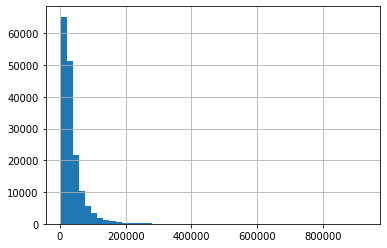

In [45]:
table_df = cleaned_impatient_df['average_covered_charges'].hist(bins=50) # Distribution analysis 
table_df

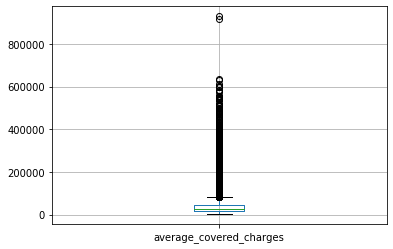

In [46]:
table_df = cleaned_impatient_df.boxplot(column='average_covered_charges') #boxplot : This confirms the presence of a lot of outliers/extreme values
table_df

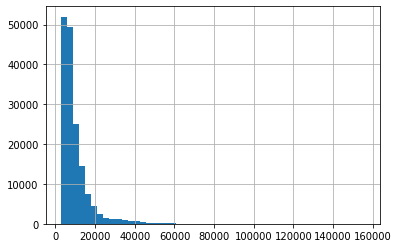

In [47]:
table_df = cleaned_impatient_df['average_total_payments'].hist(bins=50)
table_df

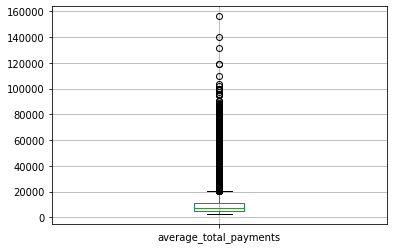

In [48]:
table_df = cleaned_impatient_df.boxplot(column='average_total_payments')
table_df

In [49]:
# checking the missing values in the dataset 
cleaned_impatient_df.apply(lambda x: sum(x.isnull()),axis=0) 

drg_definition                          0
provider_id                             0
provider_name                           0
provider_street_address                 0
provider_city                           0
provider_state                          0
provider_zip_code                       0
hospital_referral_region_description    0
total_discharges                        0
average_covered_charges                 0
average_total_payments                  0
average_medicare_payments               0
dtype: int64